In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
import csv
import time
from bs4 import BeautifulSoup
import urllib.request
import requests
import urllib
import json
import re
import os
import sys
import json
import re
import konlpy
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
import sys
import urllib.request
import json
import re
import pandas as pd
import networkx as nx
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')


ModuleNotFoundError: No module named 'selenium'

In [10]:


client_id = "4FdY0qL5azIJ4BXVjUal"
client_secret = "Ylgg4Oh_FN"
search = input('검색어를 입력하세요 : ')

blog_data = pd.DataFrame()

encText = urllib.parse.quote(search)

title = list()
description = list()
adress = list()

for i in range(1, 1000, 100):
    try:
        url = "https://openapi.naver.com/v1/search/blog?query=" + encText + '&display=100'+'&sort=sim'+f'&start={i}' # json 결과
        # url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # xml 결과

        request = urllib.request.Request(url)
        request.add_header("X-Naver-Client-Id",client_id)
        request.add_header("X-Naver-Client-Secret",client_secret)
        response = urllib.request.urlopen(request)
        rescode = response.getcode()

        if(rescode==200):
            response_body = response.read().decode('utf-8')
            response_body1 = json.loads(str(response_body))
            for i in response_body1['items']:
                hangul = re.compile('[^ ㄱ-ㅎ|가-힣]+')
                title.append(hangul.sub(r'', i['title']))
                description.append(hangul.sub(r'', i['description']))
                adress.append(i['link'])
        else:
            print("Error Code:" + rescode)

    except:
        print('Error')

blog_data['title'] = title
blog_data['description']= description
blog_data['adress'] = adress

blog_data

검색어를 입력하세요 : 커피


,title,description,adress
0,정동길카페 라운드앤드 커피 디저트 맛집,정동길카페 라운드앤드 커피 디저트 맛집 파란 하늘과 녹색 나무들 너무나 예쁜 정동...,https://blog.naver.com/miyaism?Redirect=Log&lo...
1,강릉 중앙시장 선물 커피빵 엄지척,강릉 중앙시장 선물 커피빵 엄지척 며칠 전 친구가 아이들을 데리고 강릉에 간다길래 ...,https://blog.naver.com/woaiheejun?Redirect=Log...
2,부산 기장 카페 가볼만한곳 공극샌드커피,공극샌드커피 지난번까지 다른 카페에 주로 갔었는데 이번엔 새로운 곳에 한번 가보자며...,https://blog.naver.com/80sunjin?Redirect=Log&l...
3,가정용커피머신기 드립캡슐 라이녹스,가정용커피머신기 라이녹스 현대인답게 하루에 보통 잔의 커피를 마시고 있다 그렇다 보...,https://blog.naver.com/lubkhaki?Redirect=Log&l...
4,풍미깊었던 제주도 커피 맛집,얼마 전 친구와 제주도로 놀러 갔다가 에서 유명세를 탄 제주도 커피 맛집을 찾았다 ...,https://blog.naver.com/hloveh01?Redirect=Log&l...
...,...,...,...
995,청라 카페 추천 커피인생커피과 수제청,오빠랑 바람쐬러 인천 청라 놀러갔다가 우연히 찾은 커피 맛집과 수제청 수제 레몬에이...,https://blog.naver.com/415minah?Redirect=Log&l...
996,티백커피 사무실에서 마시기 좋은 바스토니,티백커피 새로운 맛과 향 우려내서 마시는 커피라니 새롭다 비싼 커피머신 없이도 언...,https://blog.naver.com/peony_blossom?Redirect=...
997,해양쓰레기수거전시 제주시내카페 픽스커피공단점,제주시내카페 픽스커피공단점 해양쓰레기수거전시 년 월 일까지 진행한 해양쓰레기수거 전...,https://blog.naver.com/baekjeun?Redirect=Log&l...
998,에스프레소머신 청소하기 테팔 에스프레소머신 커피메이커 청소,그리고 커피맛도 더 좋아진다고하니 시작해볼께요 저희는 테팔 수동에스프레소머신을 사용...,https://blog.naver.com/kojs53?Redirect=Log&log...


In [11]:
data = []
for i in blog_data['description']:
    data.append(i)
    
print(data)

['정동길카페  라운드앤드 커피 디저트 맛집 파란 하늘과 녹색 나무들 너무나 예쁜 정동길  걷기만 왜냐면 빵이랑 커피가 진짜 너무 맛있었기 때문이닷  맛있는데 건강하기까지한 빵이었어   ', '강릉 중앙시장 선물 커피빵 엄지척 며칠 전 친구가 아이들을 데리고 강릉에 간다길래 오랜만에 옆쪽에는 커피빵을 파는 강릉당이 있었답니다 민트색의 간판에 카페에서 봤음직한 조명이 장착되어있어 ', '공극샌드커피 지난번까지 다른 카페에 주로 갔었는데 이번엔 새로운 곳에 한번 가보자며 ㅎㅎ 노란 파라솔이 인상깊었던 분위기 좋은 카페  부산 기장 카페 가볼만한곳 공극샌드커피 글사진 이름부터 ', '가정용커피머신기 라이녹스 현대인답게 하루에 보통 잔의 커피를 마시고 있다 그렇다 보니 당연히 몇 번이나 가정용커피머신기 구입을 고려했더랬다 하지만 예전엔 일주일에 보통 번 외출을 했기 ', '얼마 전 친구와 제주도로 놀러 갔다가 에서 유명세를 탄 제주도 커피 맛집을 찾았다 신선한 식재료로 곧장 제주도 커피 맛집의 메뉴판을 살펴보기 시작했다 각종 디저트는 몰론이고 음료도 다양했다 ', '부산 달맞이고개 카페 라이프커피앤티  글사진  션니블로그 안녕하세요 션니에오 오랜만에 라이프커피앤티 비아인키노란 가구를 중심으로 책과 커피 여백과 컬러 등 삶을 구성하는 요소들을 ', '섬유유연제 구매하면서 제가 평소 좋아하던 케냐 원두가 담긴 드립백 커피도 판매하길래 사봤는데요 저렴한 가격에 비해 맛과 향이 특히 좋은 것 같아 추천해볼까 해여 바로 여기커피 드립백인데요 상자에 ', '이처럼 커피에 대해 재미난 말들이 참 많은데요 아무래도 요즘은 주변에 카페도 많고 다양한 커피음료가 많은 만큼 커피를 좋아하는 인구가 더더욱 늘어나고 있기 때문이 아닐까해요 저 또한 커피를 워낙 ', '일산 가성비 좋은 포트캔커피  폭탄카스테라 일산 라페스타 쪽에 갔다가 오픈 이벤트를ㅇ하고 있어서 무조건 들어가게 되었던 포트캔커피 라페스타점 인데요 이날하고 다음날까지 스페셜티커피 를 ', '홈카페에 빠질 수 없는 커피 저는 

In [12]:
from konlpy.tag import Komoran

def tag_contents(contents):
    tag_result = []
    ma = Komoran()
    
    for i in contents:
        ma_content = ma.pos(i)
        tag_result.append(ma_content)
    return tag_result
        
ma_result = tag_contents(data)

In [13]:
FILTER=['NNG', 'NNP', "XR"]
STOPWORD =['으로', '어요', '니다', '이', '닷', '용', '공', '극', '드', '곳', '션', '오', '동', '포']
RESULT = []

def tag_result_select(ma_result,FILTER,STOPWORD):
    for i in ma_result:
        tag_result = []
        for j, k in i:
            if k in FILTER and j not in STOPWORD:
                tag_result.append(j)
        RESULT.append(tag_result)
    return RESULT

tdata = tag_result_select(ma_result,FILTER,STOPWORD)

In [14]:
from collections import Counter
from itertools import combinations

def word_matrics(tdata):
    word_count = Counter()
    for i in tdata:
        for word1, word2 in combinations(i, 2):
            if len(word1) ==1 or len(word2) ==1:
                continue
            if word1==word2:
                continue
            elif word_count[(word1, word2)] >=1:
                word_count[(word1, word2)] +=1
            else:
                word_count[(word1, word2)] =1
    return word_count

wresult = word_matrics(tdata)    

In [15]:
graphdata = []
for i in wresult:
    data = (i[0], i[1], wresult[i])
    graphdata.append(data)
graphdata

[('정동', '카페', 4),
 ('정동', '라운드', 1),
 ('정동', '앤드', 1),
 ('정동', '커피', 2),
 ('정동', '디저트', 1),
 ('정동', '맛집', 1),
 ('정동', '파란', 1),
 ('정동', '하늘', 1),
 ('정동', '녹색', 1),
 ('정동', '나무', 1),
 ('정동', '정동기', 1),
 ('정동', '걷기', 1),
 ('정동', '이랑', 1),
 ('정동', '건강', 1),
 ('카페', '라운드', 1),
 ('카페', '앤드', 1),
 ('카페', '커피', 674),
 ('카페', '디저트', 26),
 ('카페', '맛집', 12),
 ('카페', '파란', 3),
 ('카페', '하늘', 3),
 ('카페', '녹색', 1),
 ('카페', '나무', 6),
 ('카페', '정동기', 1),
 ('카페', '걷기', 1),
 ('카페', '이랑', 9),
 ('카페', '건강', 1),
 ('라운드', '앤드', 1),
 ('라운드', '커피', 20),
 ('라운드', '디저트', 1),
 ('라운드', '맛집', 1),
 ('라운드', '파란', 1),
 ('라운드', '하늘', 1),
 ('라운드', '녹색', 1),
 ('라운드', '나무', 1),
 ('라운드', '정동기', 1),
 ('라운드', '걷기', 1),
 ('라운드', '이랑', 1),
 ('라운드', '건강', 1),
 ('앤드', '커피', 2),
 ('앤드', '디저트', 1),
 ('앤드', '맛집', 1),
 ('앤드', '파란', 1),
 ('앤드', '하늘', 1),
 ('앤드', '녹색', 1),
 ('앤드', '나무', 1),
 ('앤드', '정동기', 1),
 ('앤드', '걷기', 1),
 ('앤드', '이랑', 1),
 ('앤드', '건강', 1),
 ('커피', '디저트', 54),
 ('커피', '맛집', 50),
 ('커피', '파란', 3),
 ('커피', '하늘', 6)

In [16]:
def count_key(t):
    return t[2]

graphdata.sort(key=count_key, reverse=True)
graphdata

[('카페', '커피', 674),
 ('커피', '카페', 542),
 ('커피', '머신', 225),
 ('커피', '원두', 123),
 ('머신', '커피', 111),
 ('오늘', '커피', 109),
 ('커피', '주문', 106),
 ('원두', '커피', 99),
 ('커피', '요즘', 92),
 ('커피', '메뉴', 90),
 ('아침', '커피', 88),
 ('위치', '커피', 85),
 ('요즘', '커피', 84),
 ('안녕하세요', '커피', 83),
 ('커피', '위치', 80),
 ('커피', '한잔', 80),
 ('커피', '방문', 78),
 ('추천', '커피', 77),
 ('선물', '커피', 74),
 ('더치', '커피', 74),
 ('커피', '추천', 72),
 ('커피', '사용', 72),
 ('커피', '시간', 70),
 ('강릉', '커피', 68),
 ('캡슐', '커피', 65),
 ('커피', '사람', 65),
 ('커피', '느낌', 64),
 ('커피', '생각', 63),
 ('시간', '커피', 63),
 ('맛집', '커피', 62),
 ('이번', '커피', 60),
 ('커피', '하루', 60),
 ('커피', '정도', 60),
 ('한잔', '커피', 60),
 ('커피', '사진', 59),
 ('카페', '위치', 59),
 ('하루', '커피', 58),
 ('근처', '커피', 58),
 ('커피', '카페인', 58),
 ('소개', '커피', 58),
 ('커피', '음료', 57),
 ('사진', '커피', 57),
 ('커피', '캡슐', 57),
 ('커피', '선물', 57),
 ('커피', '오늘', 56),
 ('커피', '다양', 55),
 ('커피', '아메리카노', 55),
 ('커피', '아침', 55),
 ('커피', '디저트', 54),
 ('메뉴', '커피', 54),
 ('아보카도', '커피', 53),
 ('커피', '제가', 

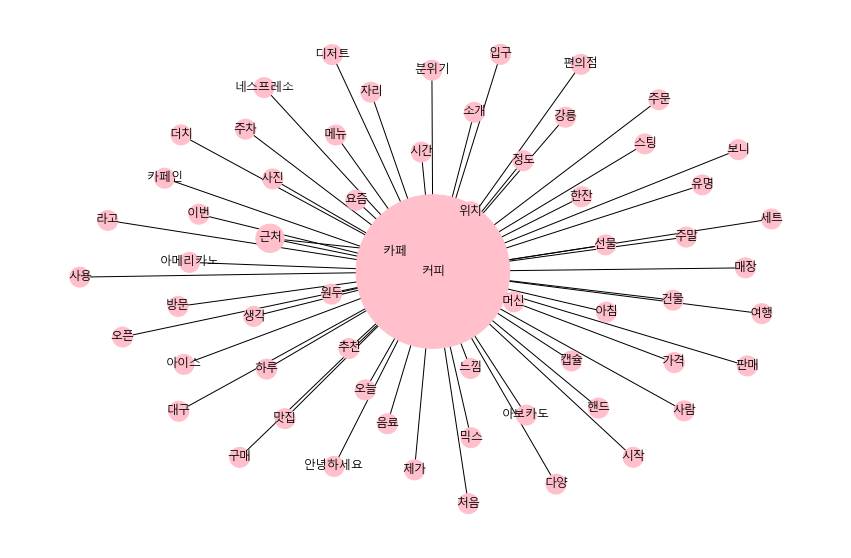

In [24]:
def sna_graph(word_data, NETWORK_MAX):
    G = nx.Graph()
    i = 0
    
    #edge 생성
    for word1, word2, count in word_data:
        i += 1
        if i > NETWORK_MAX:
            break
        G.add_edge(word1, word2, weight=count)
    
    #MST 모델 생성 
    T = nx.minimum_spanning_tree(G)
    nodes = nx.nodes(T)
    degrees = nx.degree(T)
    
    #node 사이즈 설정
    node_size = []
    for node in nodes:
        ns = degrees[node] * 400
        node_size.append(ns)
    
    #그래프로 표현
    plt.figure(figsize=(15,10))
    nx.draw_networkx(T, 
                     pos = nx.fruchterman_reingold_layout(G, k=0.5), 
                     node_size=node_size, 
                     node_color='pink',
                     font_family='Malgun Gothic',
                     with_labels=True,
                     font_size=12
                    )
    plt.axis('off')
    plt.show()

sna_graph(graphdata, 100)